In [62]:
#Import libraries
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import sklearn
import sklearn.cluster
import scipy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


###0. Getting a sense of this dataset

In [10]:
#0.0
filename = '1996_2000_Table6.xlsx'
df = pd.read_excel(filename)
print df[:1]
print len(df) 

       tbl  Year quarter citymarketid_1 citymarketid_2  \
0  Table 6  1996       1          30135          30194   

                            city1                  city2 nsmiles passengers  \
0  Allentown/Bethlehem/Easton, PA  Dallas/Fort Worth, TX    1308   39.67033   

       fare carrier_lg   large_ms   fare_lg carrier_low      lf_ms  fare_low  
0  268.1501         US  0.3047091  251.2209          US  0.3047091  251.2209  
105623


###1. Data Wrangling & Cleaning:     
I am interested in columns: Year, quarter, citymarketid_1, citymarketid_2, fare, carrier_lg, fare_lg

In [21]:
#1.0
#First I want to merge the five data files into one file, and only keep the columns I am interested in.  

#Create lists for file names
name1 = [2001, 2006, 2011, 2015]
name2 = [2005, 2010, 2014, 'q1']

#Iitialization, reread 1996 - 2000 data for reproducibility of this segment, as 'df' will be overwritten in the end of this segment
a = 0
filename = '1996_2000_Table6.xlsx'
df = pd.read_excel(filename)
df = df[['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'fare', 'carrier_lg', 'fare_lg']]
count1 = 0

#Read the other 4 data files and merge data in selected columns
count = len(df)
for a in xrange(0, 4):
    newfilename = '%s_%s_Table6.xlsx' %(name1[a], name2[a])
    newdf = pd.read_excel(newfilename)
    newdf2 = newdf[['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'fare', 'carrier_lg', 'fare_lg']]
    count1 = len(newdf2)
    count += count1
    df = pd.concat([df, newdf2], axis = 0)
    
    #Examine the correctness of merge
    print len(df), count, count1
#Export the merged data to one excel file    
newfilename2 = 'data.xlsx' 
writer = pd.ExcelWriter(newfilename2, engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
writer.save()

#Size of dataframe
print df.shape

212229 212229 106606
321173 321173 108944
410192 410192 89019
415489 415489 5297
(415489, 7)


###2. Plot Top 10 City-Pairs Fare    
Busiest 10 air routes by city pairs within the United States on Wikipedia (September 2014 - August 2015 data):    
Website link: https://en.wikipedia.org/wiki/World%27s_busiest_passenger_air_routes

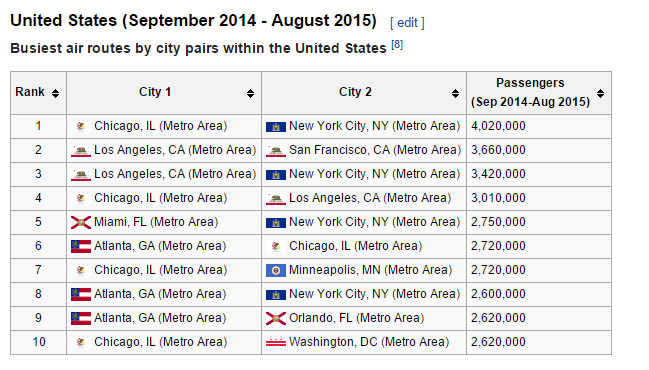

In [13]:
#2.0
#Display Wikipedia figure
filename2='Wikipedia.png'
Image(filename2)

In [14]:
#2.1
#City Market ID of these 10 routes, c1 for city market ID1, c2 for city market ID2
c1 = [30977, 32575, 32575, 30977, 32467, 30397, 30977, 30397, 30397, 30977]
c2 = [31703, 32457, 31703, 32575, 31703, 30977, 31650, 31703, 31454, 30852]

#Labels for city pairs
citylabel = ['ORD - NYC', 'LAX - SFO', 'LAX - NYC', 'ORD - LAX', 'MIA - NYC',
             'ATL - ORD', 'ORD - MSP', 'ATL - NYC', 'ATL - MCO', 'ORD - IAD', ]

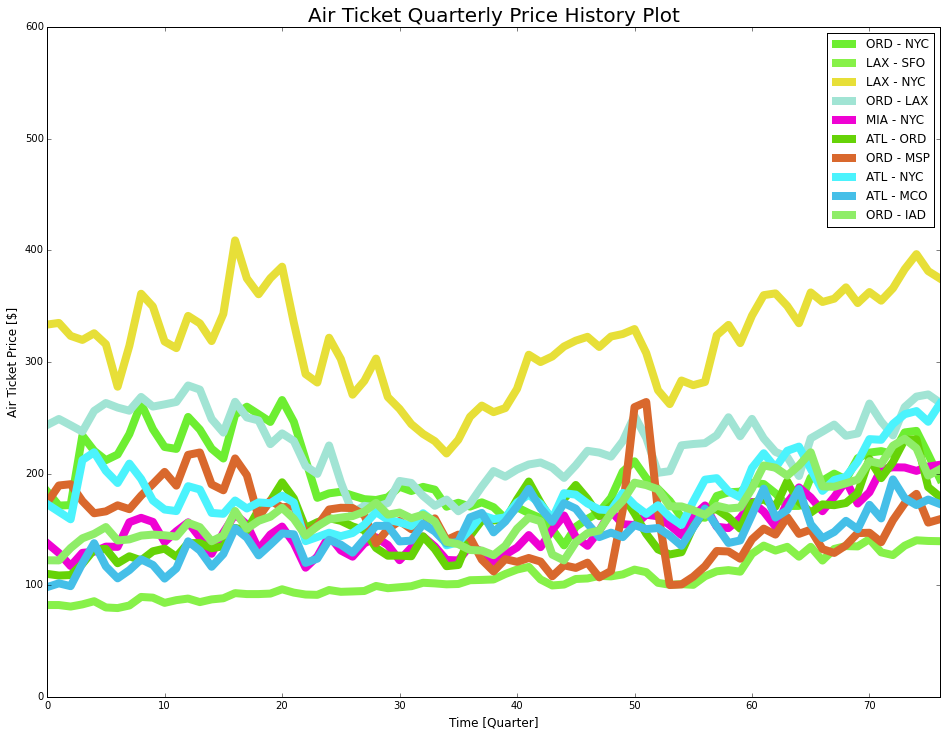

In [20]:
#2.2
#Plot these 10 routes air fare from 1996 Q1 to 2015 Q1

#Iitialization
b = 0
plt.figure(figsize= (16, 12))

for b in xrange(0, 10):
    y = df['fare'][(df['citymarketid_1'] == c1[b]) & (df['citymarketid_2'] == c2[b])]
    
    #Plot, random color
    plt.plot(y, c = np.random.rand(3), linewidth = 8, label = citylabel[b])

plt.legend(loc='upper right')
plt.xlim(0, 19 * 4 + 1 - 1)
plt.ylim(0, 600)
plt.ylabel('Air Ticket Price [$]', fontsize = 12)
plt.xlabel('Time [Quarter]', fontsize = 12)
plt.title('Air Ticket Quarterly Price History Plot', fontsize = 20)

###3. Plot with oil price:    
Download Oil price data from this website:     
West Texas Intermediate (WTI)    
https://research.stlouisfed.org/fred2/series/DCOILWTICO/downloaddata     
I cleaned the metadata in excel.

In [47]:
#3.0
oil = pd.read_excel('DCOILWTICO.xls')
print oil[:2]

        DATE  VALUE
0 1996-01-01  19.76
1 1996-04-01  21.71


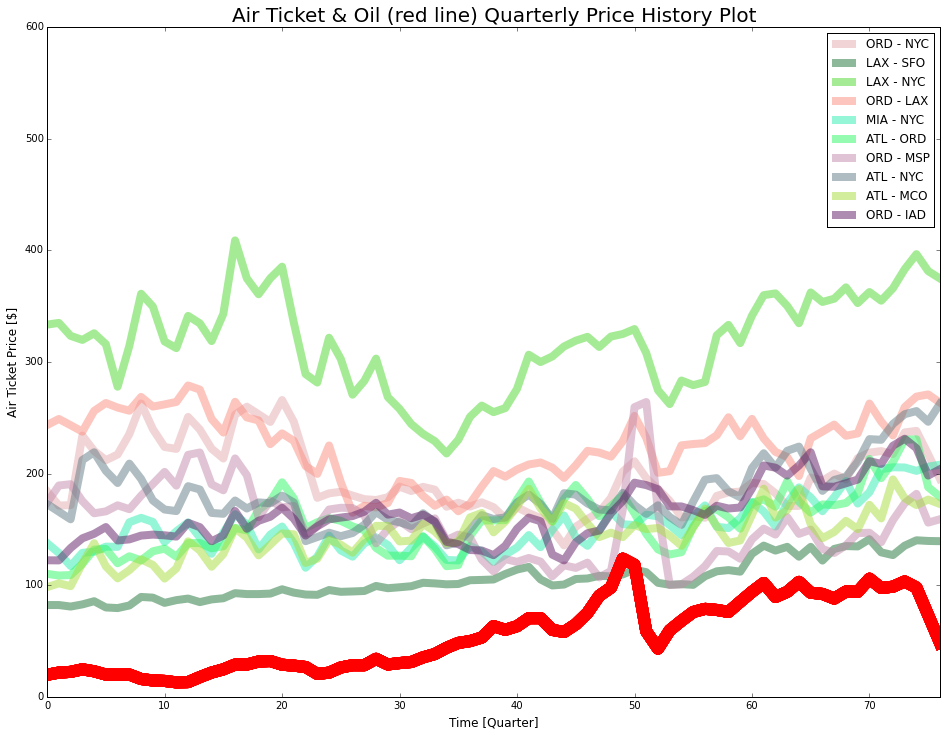

In [60]:
#3.1
#With oil price, plot 10 busiest routes air fare from 1996 Q1 to 2015 Q1 

#Iitialization
b = 0
plt.figure(figsize= (16, 12))

for b in xrange(0, 10):
    y = df['fare'][(df['citymarketid_1'] == c1[b]) & (df['citymarketid_2'] == c2[b])]
    
    #Plot, random color and transparency = 0.5
    plt.plot(y, c = np.random.rand(3), linewidth = 8, label = citylabel[b], alpha = 0.5)
    plt.plot(oil['VALUE'], c = 'r', linewidth = 12)

plt.legend(loc='upper right')
plt.xlim(0, 19 * 4 + 1 - 1)
plt.ylim(0, 600)
plt.ylabel('Air Ticket Price [$]', fontsize = 12)
plt.xlabel('Time [Quarter]', fontsize = 12)
plt.title('Air Ticket & Oil (red line) Quarterly Price History Plot ', fontsize = 20)

###4. Correlation Tests (Spearman):

In [64]:
#4.0
#For each route, I use scipy.stats.spearmanr to see the correlation between ticket price and oil price
#Iitialization
b = 0
corre = 0

for b in xrange(0, 10):
    y = df['fare'][(df['citymarketid_1'] == c1[b]) & (df['citymarketid_2'] == c2[b])]
    corre = scipy.stats.spearmanr(y, oil['VALUE'])
    print corre

(-0.28255954571744046, 0.012779405003887445)
(0.91032651558967348, 1.857988584789329e-30)
(0.23376623376623376, 0.04073834915601577)
(-0.12287712287712288, 0.28703569047487648)
(0.57048214942951792, 6.0777643487941408e-08)
(0.70621483779378513, 7.2595471522950987e-13)
(-0.53667385246332611, 4.8733545326690701e-07)
(0.40719806509280193, 0.00023753517578017366)
(0.74932961775067042, 4.5502773531284243e-15)
(0.65452968084547036, 1.072751732934377e-10)


###5. Lag Correlation:      
One assumption is air ticket price change is lagging behind oil price change. Here I test correlation between air ticket price and oil price under two circumstances: (1) ticket price change lagging 1 quarter behind oil price change (2) ticket price change lagging 2 quarters behind oil price change.

In [70]:
#5.0
#Lagging 1 Quarter
#Iitialization
b = 0
corre = 0

for b in xrange(0, 10):
    y = df['fare'][(df['citymarketid_1'] == c1[b]) & (df['citymarketid_2'] == c2[b])]
    corre = scipy.stats.spearmanr(y[1:], oil['VALUE'][:-1])
    print corre

(-0.22868079289131918, 0.046926087755983711)
(0.92462064251537934, 9.5069028229509921e-33)
(0.27521531100478469, 0.016120661210616082)
(-0.060533151059466848, 0.60344936707914698)
(0.61295967190704037, 3.9667814482461272e-09)
(0.69137388926862609, 4.7204369857484304e-12)
(-0.45058099794941897, 4.42014817782077e-05)
(0.43196172248803827, 9.7659068602103661e-05)
(0.74507177033492822, 1.1850766259348345e-14)
(0.6842652084757348, 9.472845964626137e-12)


In [71]:
#5.1
#Lagging 2 Quarters
#Iitialization
b = 0
corre = 0

for b in xrange(0, 10):
    y = df['fare'][(df['citymarketid_1'] == c1[b]) & (df['citymarketid_2'] == c2[b])]
    corre = scipy.stats.spearmanr(y[2:], oil['VALUE'][:-2])
    print corre

(-0.24116642958748222, 0.03712780765644038)
(0.91206258890469416, 5.556096741679809e-30)
(0.26799431009957325, 0.020092611457228998)
(-0.037724039829302988, 0.74796264059556572)
(0.63485064011379799, 9.5509050246988357e-10)
(0.66938833570412526, 5.1844448145778557e-11)
(-0.41780938833570413, 0.00019171618247378414)
(0.44714082503556191, 5.7767569214614927e-05)
(0.74110953058321483, 2.9051285203938734e-14)
(0.67718349928876254, 2.5442911434448882e-11)
